1. Data yang saya pilih yaitu Airline Satisfaction, diambil dari dataset website kaggle


2. Visualisasi ini bertujuan menilai kepuasan pelanggan berdasarkan fitur layanan, untuk mengidentifikasi faktor-faktor yang mempengaruhi pengalaman penumpang. Hasilnya akan memberikan informasi berharga untuk meningkatkan kualitas layanan dan kepuasan pelanggan di masa depan.
- Audiens dari visualisasi ini mencakup manajemen maskapai penerbangan, tim pemasaran, serta departemen layanan pelanggan. 
- Visualisasi ini berfungsi untuk memahami kepuasan pelanggan, memudahkan pengambilan keputusan untuk meningkatkan layanan dan pengalaman penumpang, dan menyesuaikan strategi komunikasi dengan penumpang.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('C:\\Users\\62813\\OneDrive\\Documents\\vdi\\Airline Satisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [7]:
df.drop(columns=['Arrival Delay in Minutes'],inplace= True)

In [8]:
categoricals = df.select_dtypes(include='object').columns
numericals = df.select_dtypes(exclude='object').columns
display(categoricals)
display(numericals)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes'],
      dtype='object')

Data Category

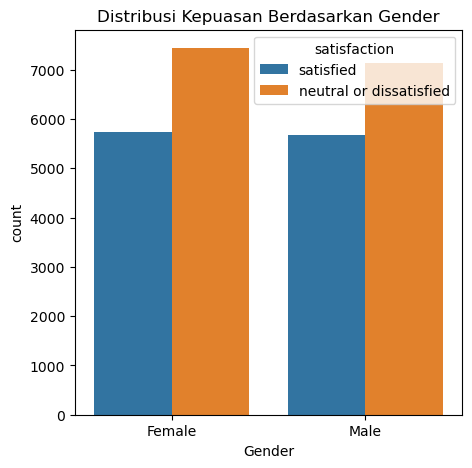

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Gender', hue='satisfaction')
plt.title('Distribusi Kepuasan Berdasarkan Gender')
plt.show()


pada gender male dan female dapat dilihat diagramnya tidak jauh beda, dan nilai kenyamananya rendah 

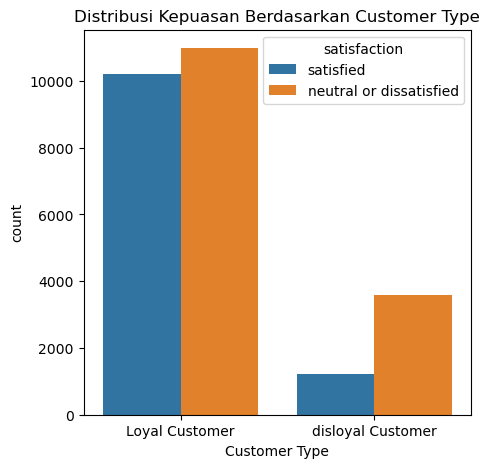

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Customer Type', hue='satisfaction')
plt.title('Distribusi Kepuasan Berdasarkan Customer Type')
plt.show()

tingkat kenyamanan juga dapat diukur dengan adanya loyal customer, tetapi tingkat kenyamananya sudah lebih baik dibandingkan disloyal customer

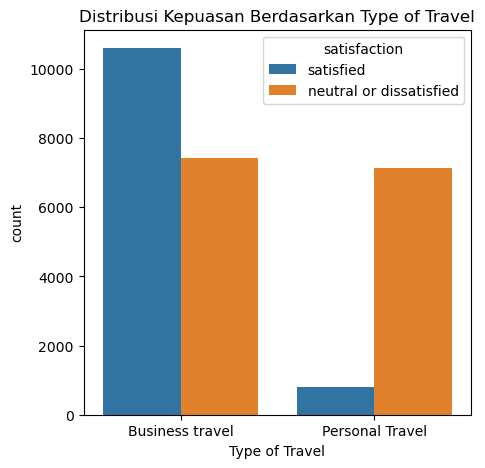

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Type of Travel', hue='satisfaction')
plt.title('Distribusi Kepuasan Berdasarkan Type of Travel')
plt.show()

tingkat kepuasan juga tinggi saat melakukan business travel dibandingkan personal travel

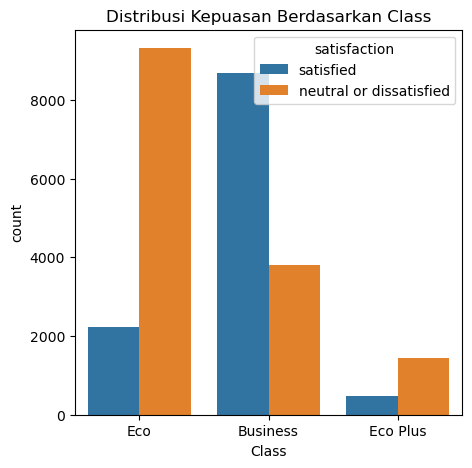

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Class', hue='satisfaction')
plt.title('Distribusi Kepuasan Berdasarkan Class')
plt.show()

dan tingkat kepuasan tinggi saat menggunakan business class, dibandingkan yang economi atau economi plus, dikarena business class memiliki tempat yang lebih besar dan pelayanan yang lebih baik

*Data Numerik*

C:\Users\62813\AppData\Local\Temp\ipykernel_21648\1683672833.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


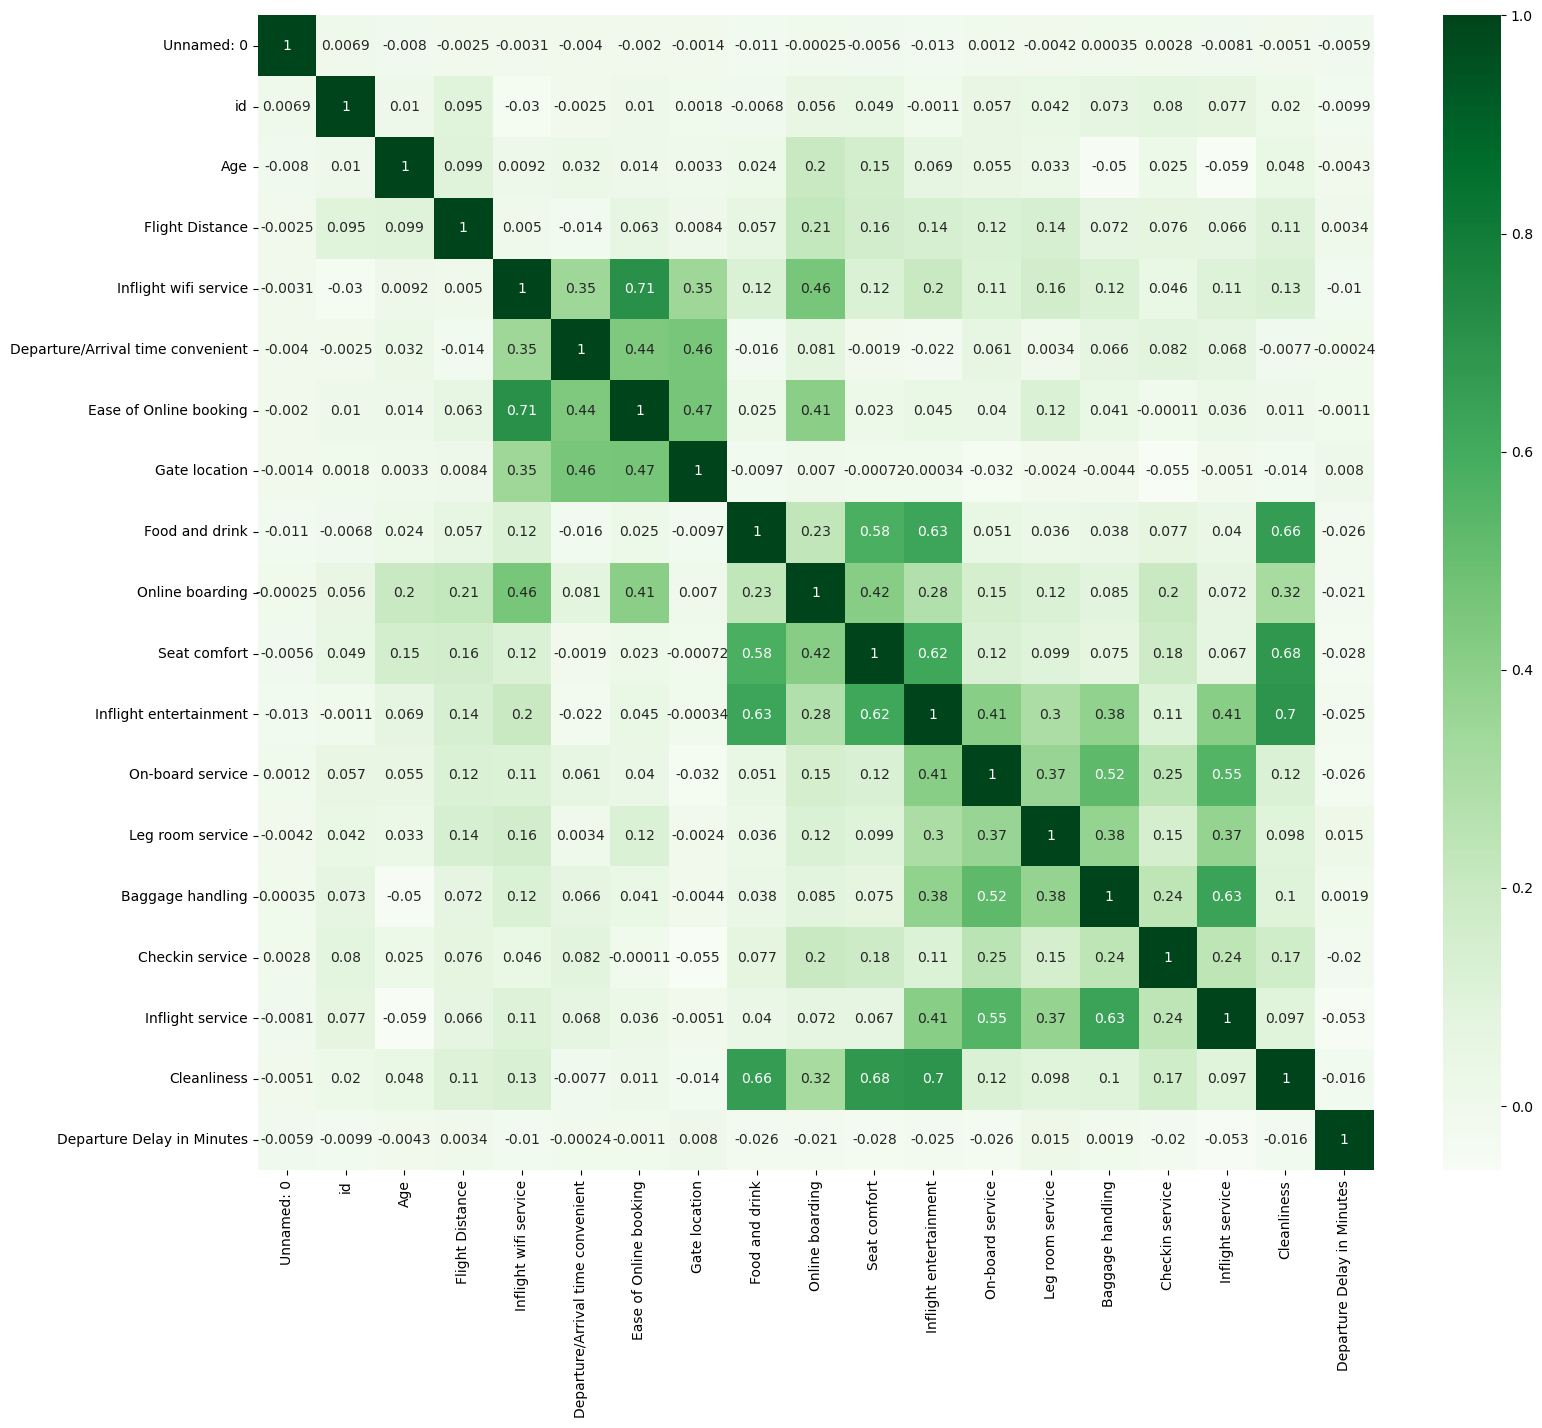

In [24]:
df.iloc[:].copy()
corr = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,cmap="Greens", annot=True)
plt.show()

heatmap untuk mencari hubungan korelasi yang paling besar yang akan kita gunakan sebagai feature kepuasan pelanggan. 

In [27]:
kolom_bagus = ['satisfaction', 'Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Cleanliness', 'Seat comfort', 'Inflight entertainment']
data = df[kolom_bagus]

<Figure size 1200x600 with 0 Axes>

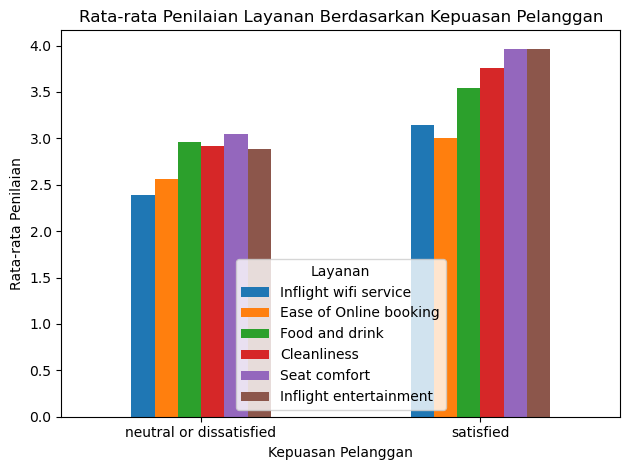

In [29]:

average_ratings = data.groupby('satisfaction').mean()
plt.figure(figsize=(12, 6))
average_ratings.plot(kind='bar')
plt.title('Rata-rata Penilaian Layanan Berdasarkan Kepuasan Pelanggan')
plt.xlabel('Kepuasan Pelanggan')
plt.ylabel('Rata-rata Penilaian')
plt.xticks(rotation=0)
plt.legend(title='Layanan')
plt.tight_layout()
plt.show()

dimana dapat dilihat para penumpang sangat puas pada pelayanannya seperti inflight wifi service, ease of online booking , food and drink , cleanliness, seat comfort dan inflight entertainment. dan dapat disimpulkan pelanggan merasa nyaman dan puas saat dilihat pada visualisasi diatas
